In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

class Task:
    def __init__(self, name, due_date):
        self.name = name
        self.due_date = datetime.strptime(due_date, '%d/%m/%Y')
        self.efficient_hours = 0
        self.completed_days = []

    def set_efficient_hours(self, hours):
        self.efficient_hours = hours

    def __str__(self):
        return f'{self.name} - {self.due_date.date()} - Completed days: {", ".join(self.completed_days)} - Efficient hours: {self.efficient_hours}'

def get_tasks():
    tasks = []
    while True:
        name = input("Enter task name (or 'q' to quit): ")
        if name == 'q':
            break
        due_date = input("Enter due date (dd/mm/yyyy): ")
        task = Task(name, due_date)
        tasks.append(task)
    return tasks

def get_daily_efficiency():
    hours = input("Enter your daily efficient hours: ")
    while not hours.isdigit():
        print("Please enter a valid number.")
        hours = input("Enter your daily efficient hours: ")
    return int(hours)

def get_weekdays():
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    selected_days = []
    print("Please select the days you are available to work:")
    for i, day in enumerate(weekdays):
        selection = input(f"{i+1}. {day} (y/n): ")
        if selection.lower() == 'y':
            selected_days.append(day)
    return selected_days

def calculate_efficient_hours(tasks, daily_efficiency, weekdays):
    for task in tasks:
        remaining_days = (task.due_date - datetime.now()).days
        if remaining_days >= 0:
            for i in range(min(remaining_days, 6)):
                day = (datetime.now() + timedelta(days=i+1)).strftime('%A')
                if day in weekdays:
                    task.completed_days.append(day)
            hours_needed = len(task.completed_days) + 1  # add an hour buffer
            task.set_efficient_hours(min(hours_needed, daily_efficiency))

def create_dataframe(tasks):
    df = pd.DataFrame(columns=['Task', 'Due Date', 'Completed Days', 'Efficient Hours'])
    for task in tasks:
        df = df.append({'Task': task.name, 'Due Date': task.due_date.date(),
                        'Completed Days': ", ".join(task.completed_days),
                        'Efficient Hours': task.efficient_hours}, ignore_index=True)
    return df

def plot_efficient_hours(df):
    fig, ax = plt.subplots()
    x = np.arange(len(df))
    y = df['Efficient Hours']
    ax.bar(x, y)
    ax.set_xticks(x)
    ax.set_xticklabels(df['Task'], rotation=45)
    ax.set_xlabel('Task')
    ax.set_ylabel('Efficient Hours')
    ax.set_title('Efficient Hours for Weekly Tasks')
    plt.show()

def main():
    tasks = get_tasks()
    daily_efficiency = get_daily_efficiency()
    weekdays = get_weekdays()
    calculate_efficient_hours(tasks, daily_efficiency, weekdays)
    print(main)


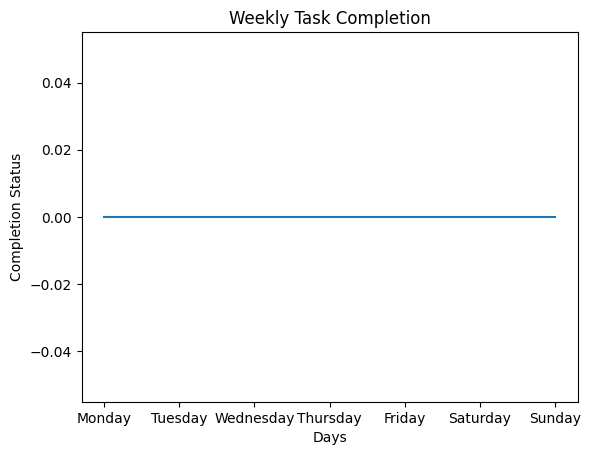

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Kullanıcıdan haftalık görevleri ve tamamlanma durumlarını alın
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tasks = {}
for day in days:
    task = input(f"Enter task for {day}: ")
    status = input(f"Is the task for {day} complete? (y/n): ")
    if status.lower() == 'y':
        status = True
    else:
        status = False
    tasks[day] = {'Task': task, 'Status': status}

# Verileri bir DataFrame'e dönüştürün
df = pd.DataFrame.from_dict(tasks, orient='index')
df.index.name = 'Day'

# Verileri görselleştirin
plt.plot(df.index, df['Status'])
plt.title('Weekly Task Completion')
plt.xlabel('Days')
plt.ylabel('Completion Status')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

class ToDoList:
    def __init__(self):
        self.tasks = pd.DataFrame(columns=['Task', 'Category', 'Due Date', 'Status'])
        self.categories = []
    
    def add_task(self):
        # Kullanıcıdan görev adı, kategori, bitiş tarihi ve durum bilgisi alınır
        task_name = input('Görev adı: ')
        category = input('Kategori: ')
        due_date_str = input('Bitiş tarihi (GG.AA.YYYY): ')
        due_date = datetime.strptime(due_date_str, '%d.%m.%Y')
        status = 'Incomplete'
        
        # Yeni görev DataFrame'e eklenir ve kullanıcıya bilgi verilir
        self.tasks = self.tasks.append({'Task': task_name, 'Category': category, 
                                        'Due Date': due_date, 'Status': status}, ignore_index=True)
        print('Görev eklendi.')
    
    def edit_task(self):
        # Kullanıcının düzenlemek istediği görevin indeksi alınır
        index = int(input('Düzenlemek istediğiniz görevin numarasını girin: '))
        
        # Eğer verilen indeks geçersiz ise hata mesajı verilir
        if index < 0 or index >= len(self.tasks):
            print('Geçersiz indeks.')
            return
        
        # Kullanıcıdan yeni bilgiler alınır ve DataFrame güncellenir
        task_name = input('Görev adı: ')
        category = input('Kategori: ')
        due_date_str = input('Bitiş tarihi (GG.AA.YYYY): ')
        due_date = datetime.strptime(due_date_str, '%d.%m.%Y')
        status = input('Durum: ')
        
        self.tasks.loc[index] = [task_name, category, due_date, status]
        print('Görev güncellendi.')
    
    def delete_task(self):
        # Kullanıcının silmek istediği görevin indeksi alınır
        index = int(input('Silmek istediğiniz görevin numarasını girin: '))
        
        # Eğer verilen indeks geçersiz ise hata mesajı verilir
        if index < 0 or index >= len(self.tasks):
            print('Geçersiz indeks.')
            return
        
        # Görev DataFrame'den silinir ve kullanıcıya bilgi verilir
        self.tasks = self.tasks.drop(index, axis=0)
        print('Görev silindi.')
    
    def display_tasks(self):
        # DataFrame'deki tüm görevler kategoriye göre gruplanır ve sayısı hesaplanır
        grouped = self.tasks.groupby('Category').size().reset_index(name='Counts')
        print(grouped)
        
        # Kullanıcının görmek istediği kategori alınır
        category = input('Hangi kategorideki görevleri görmek istersiniz? (Tümü


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

class ToDoList:
    def __init__(self, filename):
        self.filename = filename
        self.data = pd.DataFrame(columns=['task', 'category', 'due_date', 'status'])

    def load_data(self):
        try:
            self.data = pd.read_csv(self.filename)
        except FileNotFoundError:
            print("The file does not exist yet.")

    def save_data(self):
        self.data.to_csv(self.filename, index=False)

    def add_task(self, task, category, due_date):
        new_task = pd.DataFrame({'task': [task], 'category': [category], 'due_date': [due_date], 'status': ['Incomplete']})
        self.data = pd.concat([self.data, new_task], ignore_index=True)

    def view_tasks(self):
        print(self.data)

    def complete_task(self, task_index):
        try:
            self.data.loc[task_index, 'status'] = 'Complete'
        except IndexError:
            print("The task index is out of range.")

    def delete_task(self, task_index):
        try:
            self.data.drop(task_index, inplace=True)
        except IndexError:
            print("The task index is out of range.")

    def generate_report(self):
        print("Number of tasks by category:")
        print(self.data.groupby('category').size())
        print("\n")
        print("Number of tasks completed today:")
        today = datetime.now().strftime('%Y-%m-%d')
        print(self.data[(self.data['status'] == 'Complete') & (self.data['due_date'] == today)].shape[0])
        print("\n")
        print("Number of tasks completed this week:")
        start_week = datetime.now() - timedelta(days=datetime.now().weekday())
        end_week = start_week + timedelta(days=6)
        print(self.data[(self.data['status'] == 'Complete') & (self.data['due_date'] >= start_week.strftime('%Y-%m-%d')) & (self.data['due_date'] <= end_week.strftime('%Y-%m-%d'))].shape[0])
        print("\n")
        print("Tasks by status:")
        print(self.data.groupby('status').size())

    def plot_data(self):
        categories = self.data['category'].unique()
        counts = []
        for category in categories:
            counts.append(self.data[self.data['category'] == category].shape[0])
        plt.bar(categories, counts)
        plt.title('Number of Tasks by Category')
        plt.xlabel('Category')
        plt.ylabel('Number of Tasks')
        plt.show()

if __name__ == "__main__":
    filename = 'todo_list.csv'
    my_list = ToDoList(filename)
    my_list.load_data()
    while True:
        print("1. Add a task")
        print("2. View tasks")
        print("3. Complete a task")
        print("4. Delete a task")
        print("5. Generate report")
        print("6. Plot data")
        print("7. Quit")
        choice = input("Enter your choice (1-7): ")
        if choice == '1':
            task = input("Enter task name: ")
            category = input("Enter task category: ")
            due_date = input("Enter due date (YYYY-MM-DD): ")
            my_list.add_task(task, category, due_date)
            my_list.save_data()
            print("Task added successfully!")
        elif choice == '2':
            my_list.view_tasks()
        elif choice == '3':
            task_index = int(input("Enter task index to complete/delete: "))
            if choice == '3':
                my_list.complete_task(task_index)
                my_list.save_data()
                print("Task completed successfully!")
            elif choice == '4':
                my_list.delete_task(task_index)
                my_list.save_data()
                print("Task deleted successfully!")
        elif choice == '5':
            my_list.generate_report()
        elif choice == '6':
            my_list.plot_data()
        elif choice == '7':
            print("Goodbye!")
            break
        else:
            print("Invalid choice. Please enter a number between 1 and 7.")


1. Add a task
2. View tasks
3. Complete a task
4. Delete a task
5. Generate report
6. Plot data
7. Quit
Task added successfully!
1. Add a task
2. View tasks
3. Complete a task
4. Delete a task
5. Generate report
6. Plot data
7. Quit
Task completed successfully!
1. Add a task
2. View tasks
3. Complete a task
4. Delete a task
5. Generate report
6. Plot data
7. Quit
Task completed successfully!
1. Add a task
2. View tasks
3. Complete a task
4. Delete a task
5. Generate report
6. Plot data
7. Quit
Goodbye!


In [18]:
# Görevlerimizi depolamak için bir sözlük kullanacağız
# Her görevin anahtarı görevin adı, değeri ise konuları içerecek bir liste olacak
tasks = {}

# Kullanıcının görevler eklemesine izin vermek için bir fonksiyon tanımlayalım
def add_task():
    task_name = input("Görev adını girin: ")
    topics = []
    for i in range(3):
        topic_name = input("{}. konuyu girin: ".format(i+1))
        completion_time = input("{} konusunun tamamlanma saatini girin (HH:MM): ".format(topic_name))
        topics.append((topic_name, completion_time))
    tasks[task_name] = topics
    print("{} görevi {} konusuyla eklendi.".format(task_name, [topic[0] for topic in topics]))

# Kullanıcının görevleri konuya göre filtrelemesine izin vermek için bir fonksiyon tanımlayalım
def filter_by_topic():
    topic = input("Filtrelemek için bir konu adı girin: ")
    filtered_tasks = []
    for task_name, topics in tasks.items():
        for topic_name, completion_time in topics:
            if topic_name == topic:
                filtered_tasks.append(task_name)
    if len(filtered_tasks) == 0:
        print("Bu konu için hiç görev yok.")
    else:
        print("Bu konu için şu görevler var: {}".format(filtered_tasks))

# Kullanıcının seçim yapmasına izin vermek için bir döngü oluşturalım
while True:
    print("Yapılacaklar listesi uygulamasına hoş geldiniz!")
    print("1 - Görev ekle")
    print("2 - Konuya göre görevleri filtrele")
    print("3 - Çıkış yap")
    choice = input("Lütfen seçiminizi yapın (1/2/3): ")
    if choice == "1":
        add_task()
    elif choice == "2":
        filter_by_topic()
    elif choice == "3":
        print("Uygulamadan çıkılıyor...")
        break
    else:
        print("Geçersiz seçim, lütfen tekrar deneyin.")


Yapılacaklar listesi uygulamasına hoş geldiniz!
1 - Görev ekle
2 - Konuya göre görevleri filtrele
3 - Çıkış yap
Mukavemet görevi ['Rijitlik', 'a', 'b'] konusuyla eklendi.
Yapılacaklar listesi uygulamasına hoş geldiniz!
1 - Görev ekle
2 - Konuya göre görevleri filtrele
3 - Çıkış yap
Bu konu için şu görevler var: ['Mukavemet']
Yapılacaklar listesi uygulamasına hoş geldiniz!
1 - Görev ekle
2 - Konuya göre görevleri filtrele
3 - Çıkış yap
Uygulamadan çıkılıyor...


python kullanarak to do list yaz. görevlerden oluşsun ve her görevin altında 3 konu ekleme seçeneği olsun, konuların saat kaçta tamamlandığını kullanıcının girmesini sağla. görevleri konuya göre filtrele. 
Aşağıdaki kütüphaneleri ve yapıları kullanalarak kodu yaz.
En az bir tane class yapısı olmalı.
En az bir tanesini karar kontrol yapısıkullanmalısınız.
En az bir tanesini döngükullanmalısınız.
En az bir tane girdi almalısın.
En az bir tane hata kontrolü yapmalısın.
En az bir tane değişken tanımlamalısınız.
En az bir fonksiyon yazmalısınız.
Pandas,numpy,matplotlib,datetime kütüphanelerini kullanmalısın.

Yapılacaklar listesi uygulamasına hoş geldiniz!
1 - Görev ekle
2 - Konuya göre görevleri filtrele
3 - Görevlerin tamamlanma saatlerini grafiğe çiz
4 - Çıkış yap
Endüstriye Giriş görevi ['Liderlik', 'Girişgen', 'Girişimcilik'] konusuyla eklendi.
Yapılacaklar listesi uygulamasına hoş geldiniz!
1 - Görev ekle
2 - Konuya göre görevleri filtrele
3 - Görevlerin tamamlanma saatlerini grafiğe çiz
4 - Çıkış yap
Geçersiz seçim.
Yapılacaklar listesi uygulamasına hoş geldiniz!
1 - Görev ekle
2 - Konuya göre görevleri filtrele
3 - Görevlerin tamamlanma saatlerini grafiğe çiz
4 - Çıkış yap


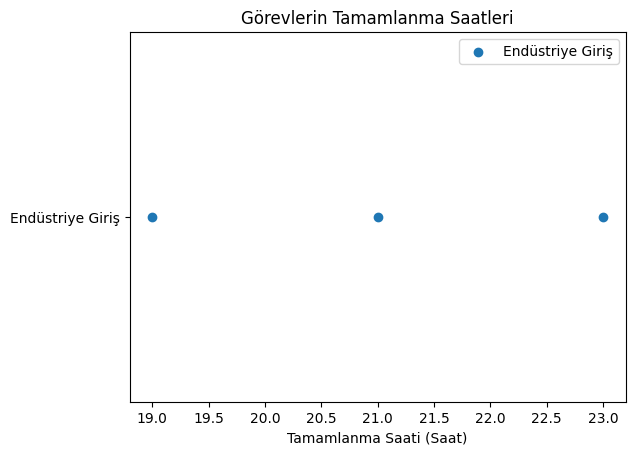

Yapılacaklar listesi uygulamasına hoş geldiniz!
1 - Görev ekle
2 - Konuya göre görevleri filtrele
3 - Görevlerin tamamlanma saatlerini grafiğe çiz
4 - Çıkış yap
1 görevi ['2', '3', '4'] konusuyla eklendi.
Yapılacaklar listesi uygulamasına hoş geldiniz!
1 - Görev ekle
2 - Konuya göre görevleri filtrele
3 - Görevlerin tamamlanma saatlerini grafiğe çiz
4 - Çıkış yap


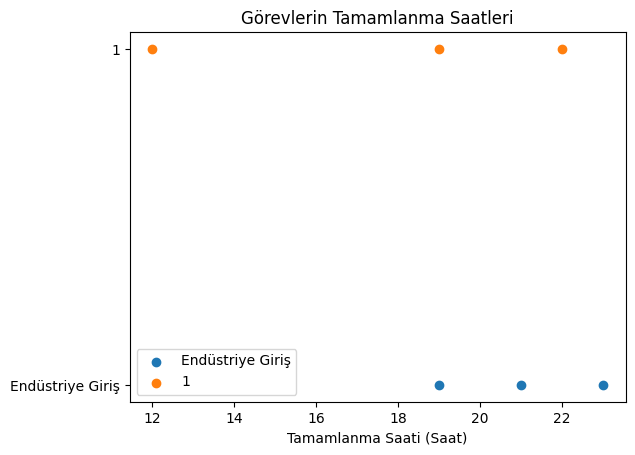

Yapılacaklar listesi uygulamasına hoş geldiniz!
1 - Görev ekle
2 - Konuya göre görevleri filtrele
3 - Görevlerin tamamlanma saatlerini grafiğe çiz
4 - Çıkış yap
Geçersiz seçim.
Yapılacaklar listesi uygulamasına hoş geldiniz!
1 - Görev ekle
2 - Konuya göre görevleri filtrele
3 - Görevlerin tamamlanma saatlerini grafiğe çiz
4 - Çıkış yap
Geçersiz seçim.
Yapılacaklar listesi uygulamasına hoş geldiniz!
1 - Görev ekle
2 - Konuya göre görevleri filtrele
3 - Görevlerin tamamlanma saatlerini grafiğe çiz
4 - Çıkış yap
Geçersiz seçim.
Yapılacaklar listesi uygulamasına hoş geldiniz!
1 - Görev ekle
2 - Konuya göre görevleri filtrele
3 - Görevlerin tamamlanma saatlerini grafiğe çiz
4 - Çıkış yap
Geçersiz seçim.
Yapılacaklar listesi uygulamasına hoş geldiniz!
1 - Görev ekle
2 - Konuya göre görevleri filtrele
3 - Görevlerin tamamlanma saatlerini grafiğe çiz
4 - Çıkış yap
Geçersiz seçim.
Yapılacaklar listesi uygulamasına hoş geldiniz!
1 - Görev ekle
2 - Konuya göre görevleri filtrele
3 - Görevlerin ta

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

class Task:
    def __init__(self, task_name, topics):
        self.task_name = task_name
        self.topics = topics

    def add_topic(self, topic_name, completion_time):
        self.topics.append((topic_name, completion_time))

    def __str__(self):
        return self.task_name

def add_task(tasks):
    task_name = input("Görev adını girin: ")
    topics = []
    for i in range(3):
        topic_name = input("{}. konuyu girin: ".format(i+1))
        while True:
            completion_time_str = input("{} konusunun tamamlanma saatini girin (HH:MM): ".format(topic_name))
            try:
                completion_time = datetime.datetime.strptime(completion_time_str, '%H:%M')
                break
            except ValueError:
                print("Hatalı saat biçimi, lütfen HH:MM biçiminde girin.")
        topics.append((topic_name, completion_time))
    task = Task(task_name, topics)
    tasks.append(task)
    print("{} görevi {} konusuyla eklendi.".format(task_name, [topic[0] for topic in topics]))

def filter_by_topic(tasks):
    topic = input("Filtrelemek için bir konu adı girin: ")
    filtered_tasks = [task.task_name for task in tasks for topic_name, _ in task.topics if topic_name == topic]
    if len(filtered_tasks) == 0:
        print("Bu konu için hiç görev yok.")
    else:
        print("Bu konu için şu görevler var: {}".format(filtered_tasks))

def plot_tasks_by_completion_time(tasks):
    task_names = [task.task_name for task in tasks]
    completion_times = [[(completion_time.hour + completion_time.minute / 60) for _, completion_time in task.topics] for task in tasks]
    fig, ax = plt.subplots()
    for i, task_name in enumerate(task_names):
        ax.scatter(completion_times[i], np.ones(len(completion_times[i])) * i, label=task_name)
    ax.set_yticks(range(len(tasks)))
    ax.set_yticklabels(task_names)
    ax.set_xlabel("Tamamlanma Saati (Saat)")
    ax.set_title("Görevlerin Tamamlanma Saatleri")
    ax.legend()

tasks = []

while True:
    print("Yapılacaklar listesi uygulamasına hoş geldiniz!")
    print("1 - Görev ekle")
    print("2 - Konuya göre görevleri filtrele")
    print("3 - Görevlerin tamamlanma saatlerini grafiğe çiz")
    print("4 - Çıkış yap")
    choice = input("Lütfen seçiminizi yapın (1/2/3/4): ")
    if choice == "1":
        add_task(tasks)
    elif choice == "2":
        filter_by_topic(tasks)
    elif choice == "3":
        plot_tasks_by_completion_time(tasks)
        plt.show()
    elif choice == "4":
        print("Uygulamadan çıkılıyor...")
        break
    else:
        print("Geçersiz seçim.")
